In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

KeyboardInterrupt: 

In [8]:
data = pd.read_csv('experiment1.csv', index_col=0)

data = data[data['Gen'] > 499]

data

,Rep,Sch,Gen,Emissions,B0,R0,P0,B1,R1,P1
500,0,0,500,403,0,0,0,0,0,0
501,0,0,501,429,0,0,0,0,0,0
502,0,0,502,65,0,0,0,0,0,0
503,0,0,503,421,0,0,0,0,0,0
504,0,0,504,981,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2254995,9,10,20495,328,0,0,0,0,0,0
2254996,9,10,20496,592,0,0,0,0,0,0
2254997,9,10,20497,796,0,0,0,0,0,0
2254998,9,10,20498,856,0,0,0,0,0,0


In [9]:
analysis_dict = {
    "Rep": [],
    "Sch": [],
    "R0": [],
    "B0": [],
    "R1": [],
    "B1": [],
}

for rep in data['Rep'].unique():
    for sch in data['Sch'].unique():
        subset = data[(data['Rep'] == rep) & (data['Sch'] == sch)]

        gens = subset.shape[0]
        bins = gens // 500

        analysis_dict['Rep'].append(rep)
        analysis_dict['Sch'].append(sch)
        analysis_dict['R0'].append(subset['R0'].sum()/bins)
        analysis_dict['B0'].append(subset['B0'].sum()/bins)
        analysis_dict['R1'].append(subset['R1'].sum()/bins)
        analysis_dict['B1'].append(subset['B1'].sum()/bins)


analysis_df = pd.DataFrame(analysis_dict)

analysis_df['log(B0/B1)'] = np.log10(analysis_df['B0']/analysis_df['B1'])
analysis_df['log(R0/R1)'] = np.log10(analysis_df['R0']/analysis_df['R1'])

analysis_df


,Rep,Sch,R0,B0,R1,B1,log(B0/B1),log(R0/R1)
0,0,0,16.550,112.100,1.775,17.975,0.794937,0.969600
1,0,1,10.075,81.600,2.425,25.450,0.506002,0.618533
2,0,2,7.075,54.600,2.775,33.550,0.211500,0.406463
3,0,3,5.850,47.900,3.400,37.100,0.110962,0.235677
4,0,4,4.875,43.475,4.275,43.875,-0.003978,0.057039
...,...,...,...,...,...,...,...,...
105,9,6,4.225,48.800,4.750,38.700,0.100709,-0.050867
106,9,7,2.975,30.150,6.750,58.300,-0.286381,-0.355817
107,9,8,2.950,24.350,8.300,69.100,-0.452979,-0.449256
108,9,9,2.675,25.250,9.800,77.950,-0.489555,-0.563902


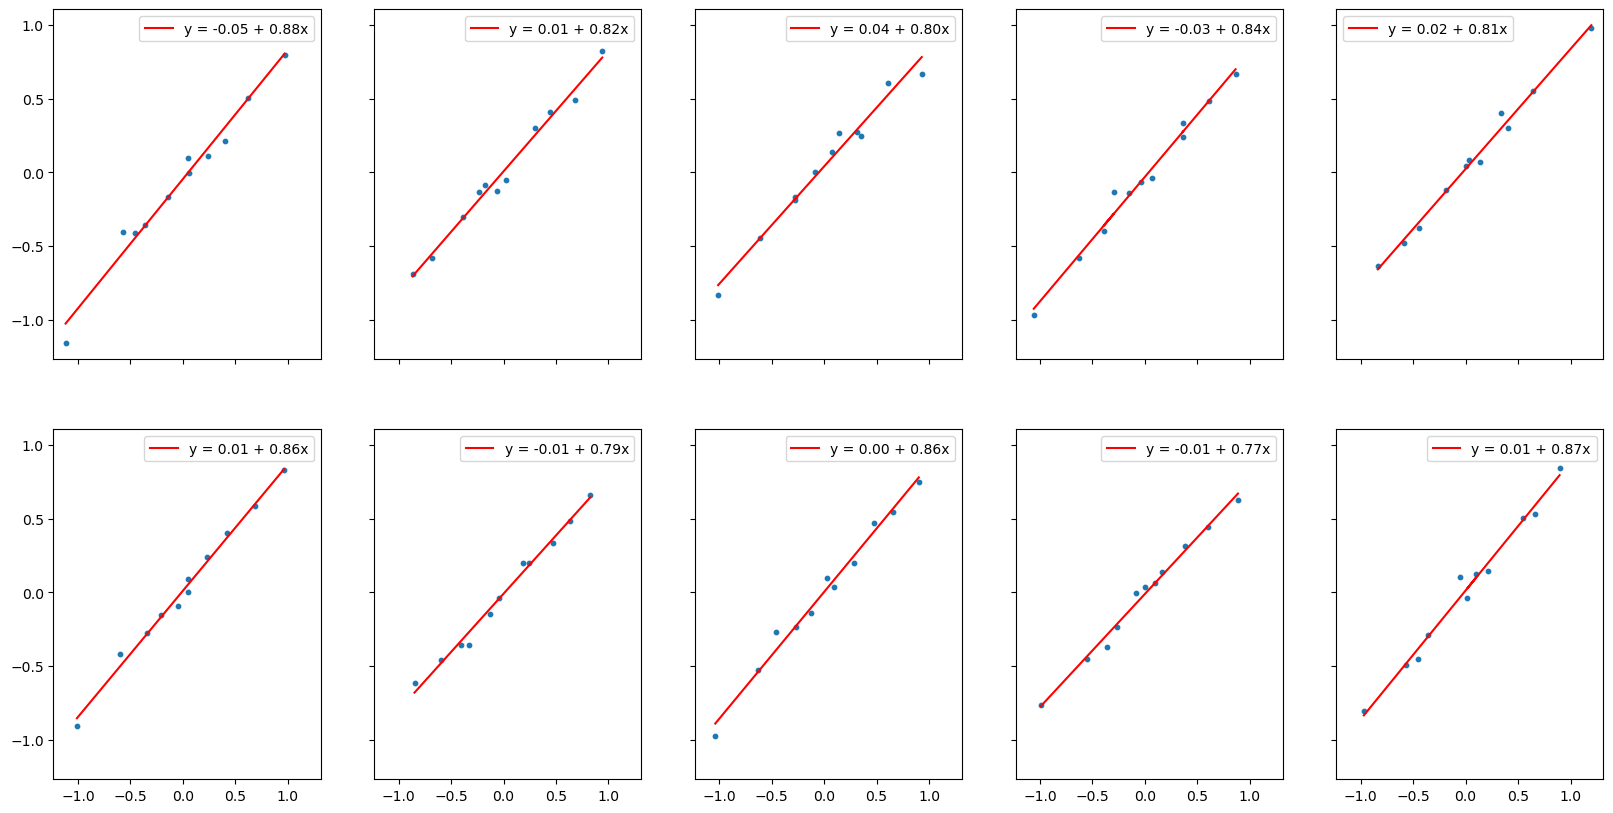

In [10]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharey=True, sharex=True)

for i, ax in enumerate(axs.flatten()):
    subset = analysis_df[analysis_df['Rep'] == i]
    x = subset['log(R0/R1)']
    y = subset['log(B0/B1)']

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    ax.scatter(x, y, s=10)
    ax.plot(x, intercept + slope*x, 'r', label=f'y = {intercept:.2f} + {slope:.2f}x')
    ax.legend()

plt.show()
